**Описание проекта**


Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

***Ход исследования:***

Шаг 1. Изучение общей информации о датасетах


- Путь к файлам: 
- /datasets/hypothesis.csv;
- /datasets/orders.csv;
- /datasets/visitors.csv. 


Шаг 2. Подготовка данных


- Заменим названия столбцов (приведем к нижнему регистру);
- Преобразуем данные в нужные типы.


Шаг 3. Приоритизация гипотез


- Применим фреймворк ICE для приоритизации гипотез;
- Применим фреймворк RICE для приоритизации гипотез;
- Укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE.


Шаг 4. Анализ A/B-теста


- Построим график кумулятивной выручки по группам;
- Построим график кумулятивного среднего чека по группам;
- Построим график относительного изменения кумулятивного среднего чека группы B к группе A;
- Построим график кумулятивного среднего количества заказов на посетителя по группам;
- Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A;
- Построим точечный график количества заказов по пользователям;
- Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей;
- Построим точечный график стоимостей заказов;
- Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов;
- Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя и в среднем чеке заказа между группами по «сырым» данным;
- Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя и в среднем чеке заказа между группами по «очищенным» данным;
- Примем решение по результатам теста.


Шаг 6. Написание общего вывода

**Описание данных**

Структура /datasets/hypothesis.csv:
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


Структура /datasets/orders.csv:
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.


Структура /datasets/visitors.csv:
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста;

### Загрузим данные и подготовим их к анализу

In [1]:
#импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

In [3]:
def data_information(dataset):
    print('Первые строки таблицы:')
    print('*'*50)
    display(dataset.head())
    print('Информация о таблице:')
    print('*'*50)
    dataset.info()
    print('Количество явных дубликатов:')
    print('*'*50)
    display(dataset.duplicated().sum())

In [4]:
data_information(hypothesis)

Первые строки таблицы:
**************************************************


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


Информация о таблице:
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
Количество явных дубликатов:
**************************************************


0

In [5]:
data_information(orders)

Первые строки таблицы:
**************************************************


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Информация о таблице:
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
Количество явных дубликатов:
**************************************************


0

In [6]:
data_information(visitors)

Первые строки таблицы:
**************************************************


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Информация о таблице:
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
Количество явных дубликатов:
**************************************************


0

Первичные наблюдения:

- Всего в датасете hypothesis 9 строк и 5 столбцов, пропуски в датасете отсутствуют;
- Всего в датасете orders 1197 строк и 5 столбцов, пропуски в датасете отсутствуют;
- Всего в датасете visitors 62 строки и 3 столбца, пропуски в датасете отсутствуют;
- Названия столбцов в датасете hypothesis и orders необходимо привести к нижнему регистру;
- В датасетах orders и visitors есть столбцы, содержащие дату и время, необходимо привести их к соответствующему к типу даты.

***Приведем к нижнему регистру названия столбцов в датасете:***

In [7]:
hypothesis.columns = hypothesis.columns.str.lower()
orders.columns = orders.columns.str.lower()

***Преобразуем дату и время***

In [8]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

### Приоритизация гипотез

#### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [9]:
hypothesis['ICE'] = hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']

pd.options.display.max_colwidth = 1
display(hypothesis[['hypothesis','ICE']].sort_values(by='ICE',ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


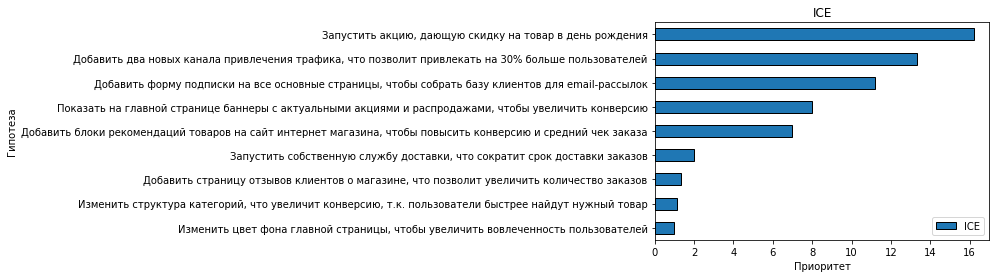

In [10]:
ax = hypothesis[['hypothesis', 'ICE']].set_index('hypothesis').sort_values('ICE', ascending=True).plot(kind='barh', ec='black')
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
ax.set_title('ICE')
plt.show()

Наиболее перспективными гипотезами являются гитпотезы под номерами: 9, 1, 8, 7

#### Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [11]:
hypothesis['RICE'] = hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'] / hypothesis['efforts']

pd.options.display.max_colwidth = 1
display(hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending = False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


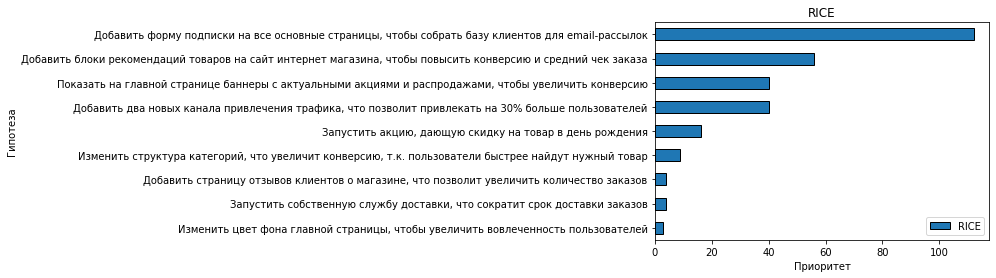

In [12]:
ax = hypothesis[['hypothesis', 'RICE']].set_index('hypothesis').sort_values('RICE', ascending=True).plot(kind='barh', ec='black')
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
ax.set_title('RICE')
plt.show()

При применении RICE приоритизация гипотез изменила порядок, теперь наиболее перспективными гипотезами стали номера: 8, 3, 1, 7.

#### Как изменилась приоритизация гипотез при применении RICE вместо ICE. 

При применении фреймворка RICE на первое место вышла гипотеза под номером 8 из-за того, что она имеет самый высокий параметр Reach равный 10, что означает действие данной гипотезы затронет большое количество пользователей.

При приминении фреймворка ICE на первом месте была гипотеза под номером 9, которая не вошла в список RICE.

Гипотезы под номерами 1,7 и 8 вошли в оба списка приоритетных гипотез.

Причина изменения результата в том, что формула фреймворка ICE, в отличии от RICE не учитывает охват.

### Анализ A/B-теста

In [13]:
orders

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


Проверим есть в таблице пользователи, которые видели обе версии сайта

In [14]:
visitorsab=np.intersect1d(orders[orders['group'] == 'A']['visitorid'].unique(),\
                          orders[orders['group'] == 'B']['visitorid'].unique())
visitorsab

array([   8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
       1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
       1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
       2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
       2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
       3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
       3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
       3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
       4186807279, 4256040402, 4266935830], dtype=int64)

In [15]:
#уберем пользователей, оказавшихся одновременно в двух группах, из датафрейма
orders=orders.query('visitorid not in @visitorsab')
orders

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


Из-за ошибки в распределении пользователей по группам, пришлось удалить из датафрейма около 15% данных, что немало, но основной принцип работы A/B-теста - один пользователь видит только одну версию сайта на протяжении всего теста.

In [16]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


Чтобы построить графики, нужно собрать кумулятивные данные. 

In [17]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

Соберём агрегированные кумулятивные по дням данные о заказах

In [18]:
#cоберём агрегированные кумулятивные по дням данные о заказах:
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {'date': 'max',
         'group': 'max',
         'transactionid': 'nunique',
         'visitorid': 'nunique',
         'revenue': 'sum'}
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [19]:
# получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

Создадим датафрейм cumulativeData

In [20]:
#объединим кумулятивные данные в одной таблице и присваивоим столбцам названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845
...,...,...,...,...,...,...
57,2019-08-29,B,510,490,4746610,17708
58,2019-08-30,A,460,437,3311413,18037
59,2019-08-30,B,531,511,4955833,18198
60,2019-08-31,A,468,445,3364656,18736


#### Построим график кумулятивной выручки по группам

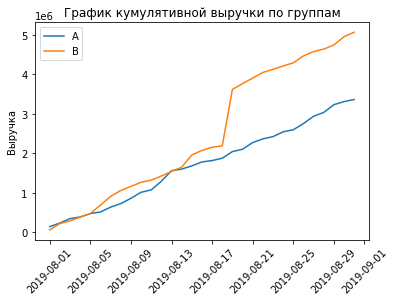

In [21]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.rcParams['figure.figsize'] = [12, 12]
plt.title('График кумулятивной выручки по группам')
plt.ylabel("Выручка")
plt.xticks(rotation=45)
plt.legend()
plt.show()

Выручка на протяжении всего теста увеличивается в обоих группах. Однако 19.08.2019 в группе В просходит резкий всплеск выручки. Это может сигнализировать о росте числа заказов, либо о появлении очень дорогих заказов в выборке. 

#### Построим график кумулятивного среднего чека по группам. 

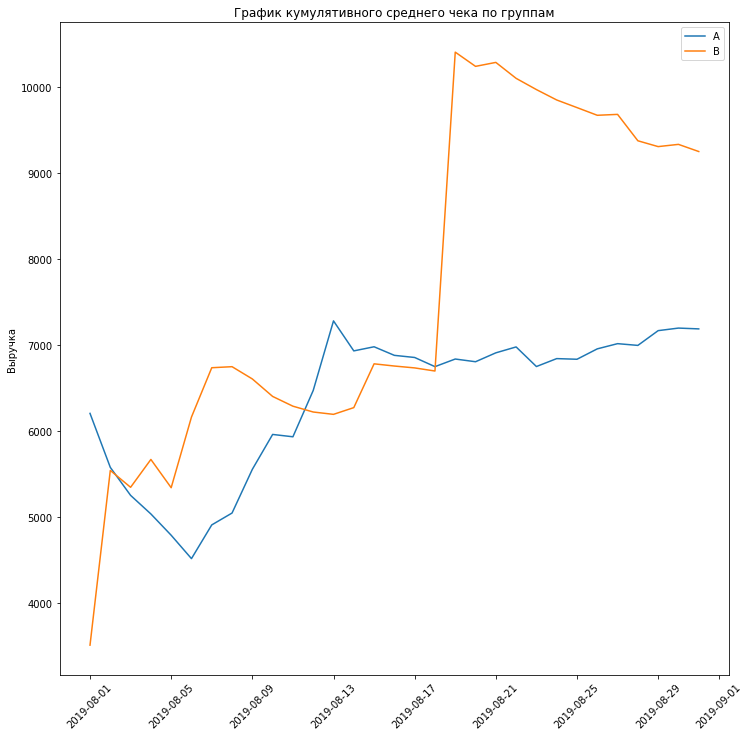

In [22]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.rcParams['figure.figsize'] = [12, 12]
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel("Выручка")
plt.xticks(rotation=45)
plt.legend()
plt.show()

Ситуация похожа на график выше, аналогично с 19.08.2019 г. происходит резкий скачок группы В. 

#### Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

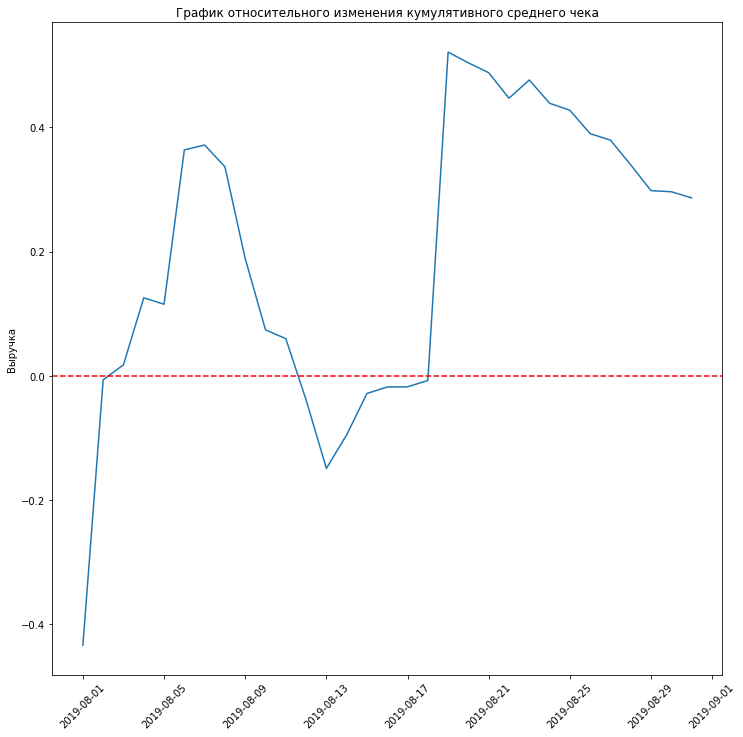

In [23]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='red', linestyle='--') 

plt.title('График относительного изменения кумулятивного среднего чека')
plt.ylabel("Выручка")
plt.xticks(rotation=45)
plt.show()

Видим резкие скачки на графике в нескольких точках. Можно предположить, что в выборке есть крупные заказы и выбросы.

#### Построим график кумулятивного среднего количества заказов на посетителя по группам.

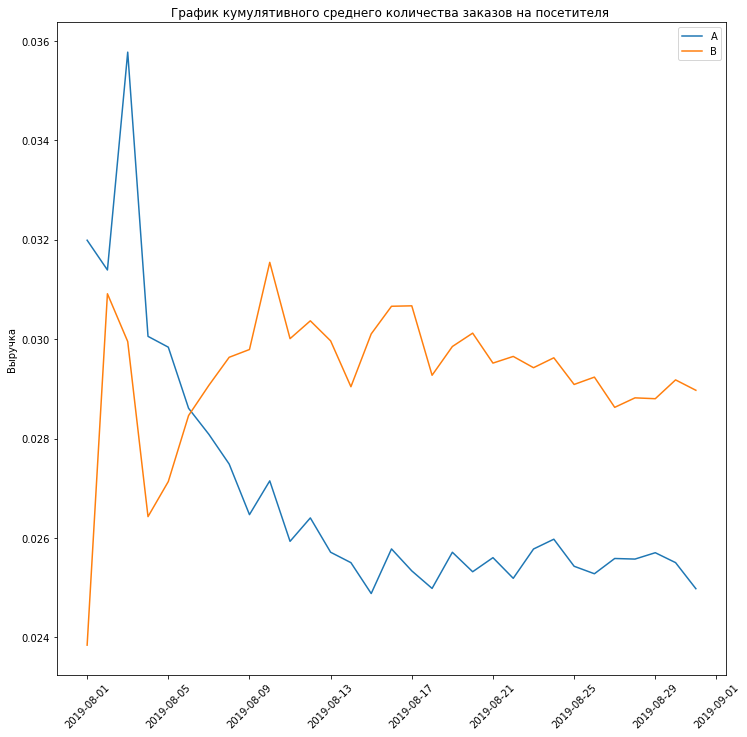

In [24]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивного среднего количества заказов на посетителя ')
plt.ylabel('Выручка')
plt.xticks(rotation=45)
plt.legend()
plt.show()

График показывает сильные колебания. Конверсия группы В выше конверсии группы А.

#### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 

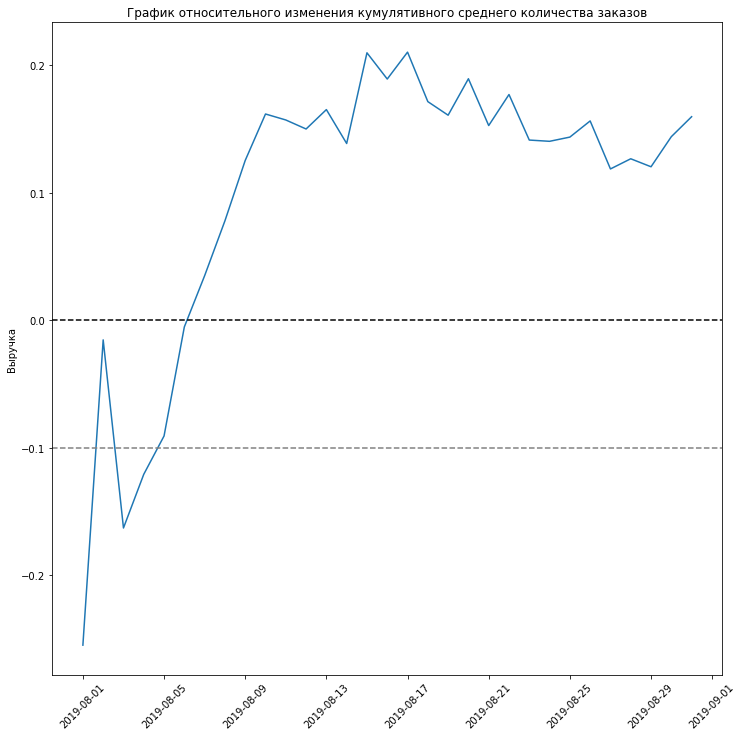

In [25]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']],\
                                                  left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.title('График относительного изменения кумулятивного среднего количества заказов')
plt.ylabel('Выручка')
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.show()

В начале теста группа В вырвалась сильно вперед, затем незначительно просела, но тенденция роста остается.

#### Построим точечный график количества заказов по пользователям.

In [26]:
ordersByUsers = (
    orders.groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'})
)

ordersByUsers.columns = ['userid', 'orders']

display(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

,userid,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


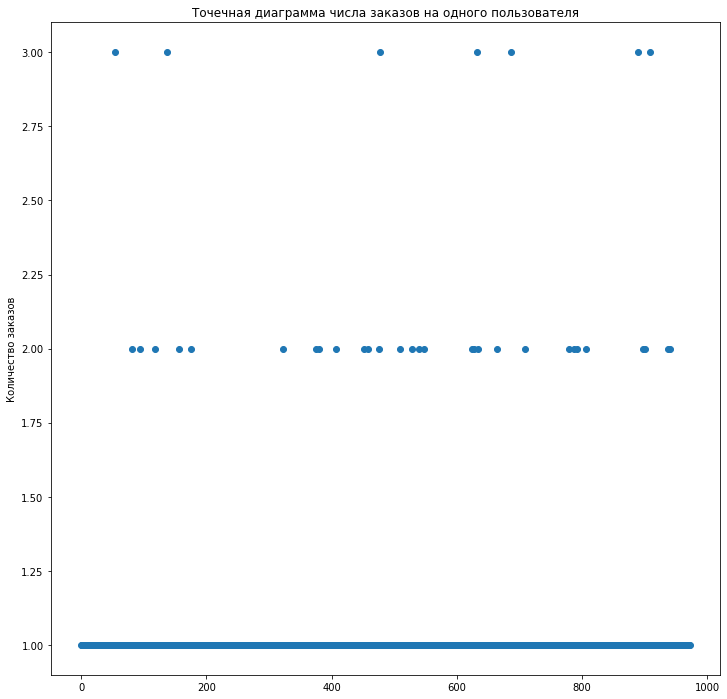

In [27]:
x_values = pd.Series(range(0,len(ordersByUsers['orders'])))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечная диаграмма числа заказов на одного пользователя')
plt.ylabel('Количество заказов')
plt.show()

В основном пользователи совершают покупки 1-2 раза, но есть покупатели около 3-х покупок.

#### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.



In [28]:
percentiles = np.percentile(ordersByUsers['orders'], [95, 99])
print('Перцентили:\n95: {}\n99: {}'.format(percentiles[0],percentiles[1]))

Перцентили:
95: 1.0
99: 2.0


Не более 5% пользователей оформляли 1 заказ. И 1% пользователей оформляли заказы более двух раз. 

#### Построим точечный график стоимостей заказов. 

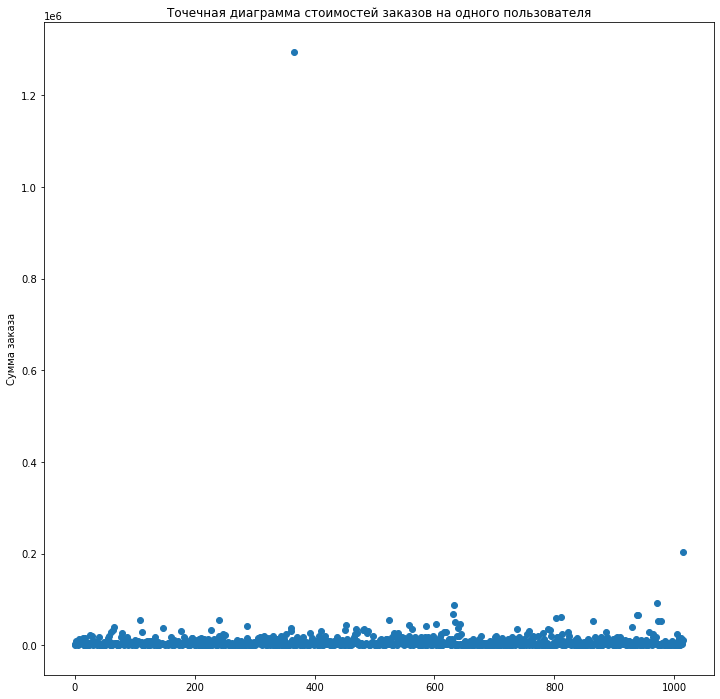

In [29]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title('Точечная диаграмма стоимостей заказов на одного пользователя')
plt.ylabel('Сумма заказа')
plt.show()

На графике видно два аномальных значения в виде стоимости заказа около 200 000 и заказа более чем на 1 200 000.

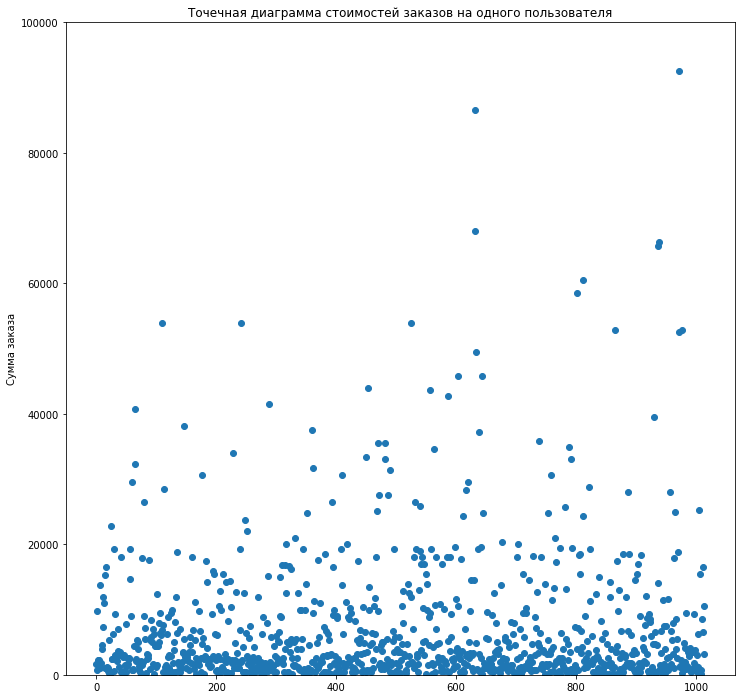

In [30]:
#увеличим масштаб и посмотрим на него без аномально больших значений
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title('Точечная диаграмма стоимостей заказов на одного пользователя')
plt.ylabel('Сумма заказа')
plt.ylim([0, 100000])
plt.show()

Основное количество заказов, совершаемых пользователями, имеют стоимость до 20 000.

#### Посчитаем 95-й и 99-й перцентили стоимости заказов.

In [31]:
percentiles = np.percentile(orders['revenue'], [95, 99])
print('Перцентили:\n95: {}\n99: {}'.format(percentiles[0],percentiles[1]))

Перцентили:
95: 26785.0
99: 53904.0


Не более 5% заказов дороже 26 785 рублей и не более 1% дороже 53 904 рублей.

#### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 

Посчитаем статистическую значимость различия в среднем количестве заказов между группами.

In [32]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

In [33]:
print('Количество покупателей в группе A: {}'.format(ordersByUsersA['orders'].count()))
print('Количество покупок в группе А: {}'.format(ordersByUsersA['orders'].sum()))
print('Количество посетителей в группе A: {}\n'.format(visitors[visitors['group']=='A']['visitors'].sum()))
print('Количество покупателей в группе B: {}'.format(ordersByUsersB['orders'].count()))
print('Количество покупок в группе B: {}'.format(ordersByUsersB['orders'].sum()))
print('Количество посетителей в группе B: {}'.format(visitors[visitors['group']=='B']['visitors'].sum()))

Количество покупателей в группе A: 445
Количество покупок в группе А: 468
Количество посетителей в группе A: 18736

Количество покупателей в группе B: 528
Количество покупок в группе B: 548
Количество посетителей в группе B: 18916


In [34]:
# датафрейм с посетителями по дням в группе А
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
#переименуем столбцы
visitorsADaily.columns = ['date', 'visitorsPerDateA']

In [35]:
# датафрейм с посетителями по дням в группе B
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
#переименуем столбцы
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

In [36]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitorsADaily['visitorsPerDateA']\
                    .sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitorsBDaily['visitorsPerDateB']\
                    .sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Сформулируем гипотезы:
1. H0: По «сырым» данным различий в конверсии групп A и B нет
2. H1: По «сырым» данным разница в конверсии групп A и B статистически значима

In [37]:
#применим критерий Манна-Уитни
print('Относительный прирост конверсии группы B по отношению к группе A: {0:.3f}'.format(sampleB.mean()/sampleA.mean()-1)) 
print('alpha =',0.05)
alpha = 0.05
results = stats.mannwhitneyu(sampleA, sampleB)
print('P-value = {0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Относительный прирост конверсии группы B по отношению к группе A: 0.160
alpha = 0.05
P-value = 0.011
Отвергаем нулевую гипотезу


P-value  = 0.011. Оно меньше 0.05, значит статистически значимое различие в среднем числе заказов между группами есть. Oтносительный прирост конверсии группы B равен 16%.

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

Сформулируем гипотезы:
1. H0: По «сырым» данным различий в средних чеках в группах A и B нет
2. H1: По «сырым» данным разница в средних чеках в группах A и B статистически значима

In [38]:
#применим критерий Манна-Уитни
print('Относительное изменение среднего чека в группе B по отношению группы A: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))
print('alpha =',0.05)
results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
print('P-value: {0:.3f}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Относительное изменение среднего чека в группе B по отношению группы A: 0.287
alpha = 0.05
P-value: 0.829
Не получилось отвергнуть нулевую гипотезу


P-value больше 0.05 - статистически значимых различий в среднем чеке между группами нет, но различие среднего чека между сегментами 28.7%

#### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 

Ранее мы установили, что не более 5% заказов дороже 26 785 рублей и не более 1% дороже 53 904 рублей.
А также установили, что более 5% пользователей оформляли больше чем 1 заказ и 1% пользователей оформляли заказы более двух.

Сделаем срезы пользователей с числом заказов больше 2-х и стоимостью заказа дороже 53 904. Объединим их в таблице abnormalUsers и узнаем, сколько всего аномальных пользователей.

In [39]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > int(np.percentile(ordersByUsers['orders'], [99]))]['userId'],\
                                 ordersByUsersB[ordersByUsersB['orders'] > int(np.percentile(ordersByUsers['orders'], [99]))]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > int(np.percentile(orders['revenue'], [99]))]['visitorid']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print('Количество аномальных пользователей:' ,len(abnormalUsers)) 

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
dtype: int64
Количество аномальных пользователей: 16


In [40]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],\
                             pd.Series(0, index=np.arange(visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),\
                             name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],\
                             pd.Series(0, index=np.arange(visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),\
                             name='orders')],axis=0)

Сформулируем гипотезы:
1. H0: По очищенным данным разницы в конверсии групп A и B нет
2. H1: По очищенным данным разница в конверсии групп A и B статистически значима

In [41]:
#применим критерий Манна-Уитни
print('Относительный прирост конверсии группы B по отношению к группе A по "очищенным данным": {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 
print('alpha =',0.05)
results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)
print('P-value = {0:.3f}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Относительный прирост конверсии группы B по отношению к группе A по "очищенным данным": 0.189
alpha = 0.05
P-value = 0.007
Отвергаем нулевую гипотезу


P-value меньше 0.05 - статистически значимое различие есть, как и в случае с "сырыми" данными.

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Сформулируем гипотезы:
1. H0: По очищенным данным различий в средних чеках в группах A и B нет
2. H1: По очищенным данным разница в средних чеках в группах A и B статистически значима

In [42]:
print('Относительное изменение среднего чека в группе B по отношению группы A по "очищенным данным": {0:.3f}'.format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean() - 1))

print('alpha =',0.05)
results = stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'])

print('P-value: {0:.3f}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Относительное изменение среднего чека в группе B по отношению группы A по "очищенным данным": -0.032
alpha = 0.05
P-value: 0.788
Не получилось отвергнуть нулевую гипотезу


P-value значительно больше 0.05, значит статистически значимых различий как и в случае с "сырыми" данными нет. При этом разница между сегментами после очищения данных от аномалий и выбросов кратно сократилась с 28.7% до 3.2%.

#### Примите решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

**При примерно равных показателях среднего чека в группах А и В, разница показателей конверсии между группами А и В до и после очистки данных является статистически значимой, что пользволяет принять решение остановить тестирование и зафиксировать победу группы B.**

**Вывод по результатам теста:**
- Различие в конверсиях в группе А и В было установленно и по "сырым" и по "очищенным" данным. Oтносительный прирост конверсии группы B равен 16.0% по "сырым" данным и 18.9 % по "очищенным" данным.


- Тест показал отсутствие различий в средних чеках у групп А и В как по "сырым", так и по "очищенным" данным. При этом средний чек после очищения данных от аномалий и выбросов изменился с 28.7% до 3.2%.


- Кумулятивные метрики за время проведения теста показывали лучший результат в группе B. До очистки данных от аномальных пользователей график кумулятивного среднего чека группы В показывал резкие колебания, но после очищения данных разница между средними чеками стала минимальной.

**Вывод по приоритезации гипотез:**
- При применении фреймворка ICE наибольшую оценку имели гпиотезы под номерами 9,1 и 8. После применения фреймворка RICE приоритеты изменились и на превое место вышли гипотезы 8, 3 и 1. Это объясняется тем, что формула фреймворка ICE, в отличии от RICE не учитывает охват.

- В нашем случае наиболее приоритетными гипотезами будут 8 и 1, которые звучат следующим образом:

1. "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",
2. "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей".